In [2]:
import pandas as pd
rtv = pd.read_csv('RTV.csv', index_col='id')
pd.options.display.max_rows = 20

Opis tabele:
Vsakemu članku smo pripisali id (st.-R/S) ter izpisali sledeče podatke:
1. rubrika,
2. datum objave,
3. mesec objave,
4. seznam avtorjev, ki so sodelovali pri objavi članka,
5. število besed v članku,
6. kosinusno podobnost najpodobnejšega članka iz drugega medija, ki je bil objavljen pred 
analiziranim člankom,
7. Levenshteinova razdalja med naslovoma teh člankov,
8.zamik v objavi teh člankov(v minutah)
9. id pdobnega članka,
10. podatki 6-9 se ponovijo še za 2. in 3. najbolj podobna članka iz drugega medija, ki sta bila 
objavljena pred analiziranim člankom. 
V resnici so najbpomembnejši podatki kosinusne podobnosti, druge podatke uporabimo samo za hiter pogled
korelacij med njimi. 


In [1]:
rtv.head()

NameError: name 'rtv' is not defined

0.5665925725902993 0.15814538629838373


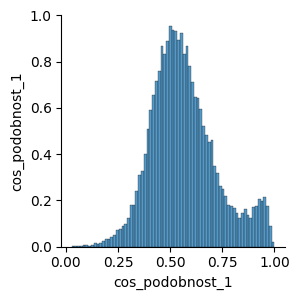

In [8]:
import seaborn as sns
sns.pairplot(rtv[["cos_podobnost_1"]], height=3)
"""cca imamo normalno porazdelitev. Moč je opaziti kar znaten 
porast podobnost na repu grada tj. 0.9 - 1.0.
to potrjujeta tudi povprečje in std:"""
print(rtv["cos_podobnost_1"].mean(), rtv["cos_podobnost_1"].std())


Ne moremo opaziti kakih močnih korelacij. Tolažilno dejstvo je, da je velik delež
časovnih zamikov objav majhen (okoli 20-40 min), tako da smo najbrž res člankom (v večini) prirerdili
vsebinsko enak članek. 

In [ ]:
rtv["cos_podobnost_1"].mean()
len(rtv[rtv.cos_podobnost_1 > 0.9])
#imamo toliko zelo zelo podobnih

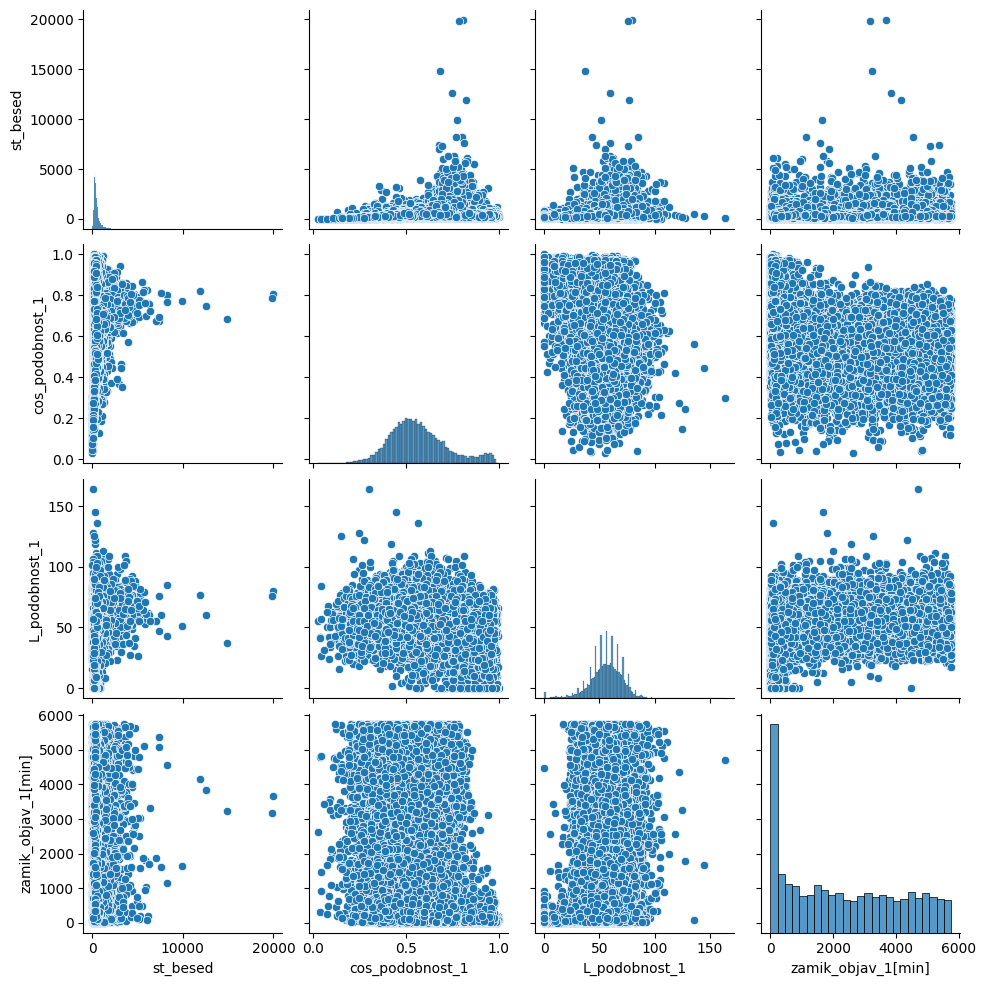

In [10]:
sns.pairplot(rtv[["st_besed", "cos_podobnost_1", "L_podobnost_1","zamik_objav_1[min]"]])

<Axes: xlabel='rubrika'>

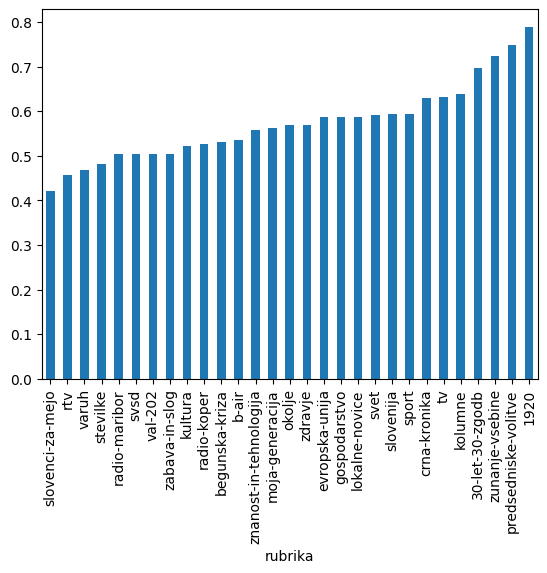

In [11]:

rtv.groupby("rubrika")["cos_podobnost_1"].mean().sort_values().plot.bar()

poglejmo, članki katerih rubrik so najpodobnejši siolovim člankov.
nepresenetljivo ima rubrika 'rtv' skoraj najmanjpšo podobnost.
nekatere rubrika imajo nanj objav in pri teh je malo težje kazati s prstom na
kakšno plagiatstvo. Poglejmo katere rubrike so najplodnejše v naslednji celici.

<Axes: xlabel='rubrika'>

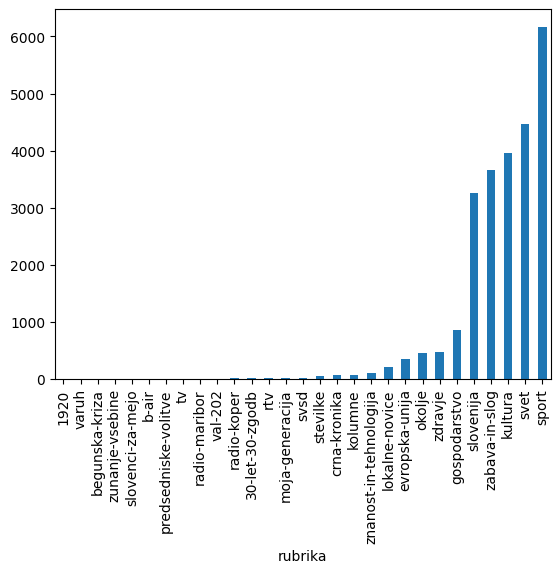

In [12]:
#najplodnejpe so rubrike :["slovenija", "svet", "zabava-in-slog", "kultura", "sport"]
rtv.groupby("rubrika").size().sort_values().plot.bar()

Poglejmo povprečne podobnosti za te rubrike:


In [ ]:
lst = ["slovenija", "svet", "gospodarstvo", "zabava-in-slog", "kultura", "sport"]
pog_r = rtv[(rtv.rubrika == "slovenija") | (rtv.rubrika == "svet") | (rtv.rubrika == "zabava-in-slog") | (rtv.rubrika == "kultura") | (rtv.rubrika == "sport")]
pog_r.groupby("rubrika")["cos_podobnost_1"].mean().sort_values().plot.bar()


Svet, Slovenija in sport imajo občutneje podobnejše članke. 
Najizvirnejši članki so iz rubrike kultura.


Zrišimo časovno odvisnost podobnosti.


<Axes: xlabel='mesec'>

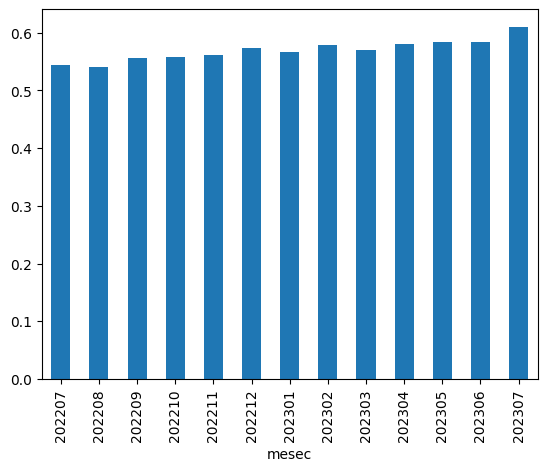

In [3]:
rtv.groupby("mesec")["cos_podobnost_1"].mean().plot.bar()


Izgleda enakomerno skozi celotno leto. 

In [14]:
avt_rtv = pd.read_csv('avtorji_R.csv', index_col='id')
pd.options.display.max_rows = 10
avt_rtv


,avtor,st_clankov,avg_cos_podobnost,mediana_cos_podobnost,st_0.9-1.0,st_0.8-0.9,st_0.7-0.8,st_0.6-0.7,st_0.5-0.6
id,,,,,,,,,
A-1-R,M. Z.,661,0.614298,0.596108,59,54,76,133,150
A-2-R,T. K. B.,771,0.564162,0.537500,40,33,46,136,227
A-3-R,La. Da.,524,0.622058,0.589225,53,36,66,93,146
A-4-R,Avtomobilnost,193,0.408467,0.401105,0,0,1,4,20
A-5-R,Ksenja Tratnik,38,0.751713,0.756447,0,9,23,6,0
...,...,...,...,...,...,...,...,...,...
A-72-R,Nadina Štefančič,29,0.722313,0.731988,0,3,16,10,0
A-73-R,Sebastjan Plevnjak,30,0.527256,0.533123,0,0,0,7,12
A-74-R,Miha Merljak,59,0.491881,0.490746,0,0,0,3,23


Nnaložimo tabelo za analizo korelacij med avtorji in podobnostjo člankov.
Za vsakega avotjr asmo zabeležili število objavljenih člankov, povprečno kosinusno podobnost in
mediano kosinusnih podobnosti. Sledijo podatki o številu člankov s kosinusno podobnostjo v nekem
intervalu, ki je zabeležen na vrhu stolpca.

In [18]:
avt_rtv["st_clankov"].median()
izborR = avt_rtv[avt_rtv["st_clankov"] > 115.5]


Izberemo samo avtorje v 50 percentilu glede na število objav

Poglejmo, kdo ima največ navdiha iz siola:


In [ ]:
avt_rtv.sort_values("avg_cos_podobnost", ascending=False)

Zmagala je Ksenja Tratnik.

Poglejmo kateri avtorji imajo največ člankov s kos. podobnostjo nad 0.9


In [ ]:
avt_rtv.sort_values("st_0.9-1.0", ascending=False)


Zmaga D. S., s presenetljivimi 98 članki s kos. podobnostmi nad 0.9

Narišimo še graf:
Uporabili bomo ožji izbor za preglednost.


In [4]:
izborR.sort_values("avg_cos_podobnost", ascending=False).plot.bar(x = "avtor", y="avg_cos_podobnost")

NameError: name 'izborR' is not defined

V ožjem izboru je prevladal Tilen Jamnik. 
zanimivo, da imata avtomobilnost in STA najmanjšo podobnost. 

Poglejmo še za mediano:


In [ ]:
izborR.sort_values("mediana_cos_podobnost", ascending=False).plot.bar(x = "avtor", y="mediana_cos_podobnost")


Pdobna zgodba

Poglejmo, kateri avtor je bil najbolj produktiven:


In [ ]:
izborR.sort_values("st_clankov", ascending=False).plot.bar(x = "avtor", y="st_clankov")


Največ člankov je objavil/a B. V.
Opomnimo, da so na konu grafa avtorji, ki niso resnično avtorji, ampak
so samo plod napak pri zajemu podatkov.  

In [25]:
siol = pd.read_csv('SIOL.csv', index_col='id')
pd.options.display.max_rows = 20

In [22]:
siol.head(10)
#Opis tabele je enak kot pri opisu tabele za rtv


NameError: name 'siol' is not defined

Povprečje podobnosti in standardna deviacija


In [ ]:
print(siol.cos_podobnost_1.mean(), siol.cos_podobnost_1.std()) 
#Sta podobni kot pri rtv
sns.pairplot(rtv[["cos_podobnost_1"]], height=3)


Spet porast na repu grafa.

Število zelo zelo podobnih člankov:

In [5]:
len(siol[siol.cos_podobnost_1 > 0.9])


NameError: name 'siol' is not defined

Katere rubrike imajo najpodobnejše članke?


In [ ]:
siol.groupby("rubrika")["cos_podobnost_1"].mean().sort_values().plot.bar()

Poglejmo rubrike z največ članki:


In [ ]:
siol.groupby("rubrika").size().sort_values().plot.bar()


Najbogatejše rubrike so svet, trendi, slovenija in sportal

Oglejmo si podobnosti v teh največjih rubrikah:


In [ ]:
pog_s = siol[(siol.rubrika == "slovenija") | (siol.rubrika == "svet") | (siol.rubrika == "sportal") | (siol.rubrika == "trendi") | (rtv.rubrika == "kultura") | (rtv.rubrika == "sport")]
pog_s.groupby("rubrika")["cos_podobnost_1"].mean().sort_values().plot.bar()


Zgleda dokaj enakomerno.
Pri RTV smo zasledili malo večje razlike. 

Poglejmo časovno odvisnost povprečja podobnosti skozi leto:


In [ ]:
siol.groupby("mesec")["cos_podobnost_1"].mean().plot.bar()


Zasledimo manjši porast podobnosti v jeseni. 

Naložimo tabelo za analizo korelacij med avtorji in podobnostjo člankov.

In [ ]:
avt_siol = pd.read_csv('avtorji_S.csv', index_col='id')
pd.options.display.max_rows = 10
avt_siol


Poglejmo, kdo ima največ navdiha iz rtv:


In [ ]:
avt_siol.sort_values("avg_cos_podobnost", ascending=False)


Rekord je malo manjši kot pri rtv

Naredimo izbor avtorjev, ki so v 50 percentilu glede na število objav:

In [ ]:
izborS = avt_siol[avt_siol["st_clankov"] > avt_siol["st_clankov"].median()] 

Narišimo še graf:


In [ ]:
izborS.sort_values("avg_cos_podobnost", ascending=False).plot.bar(x = "avtor", y="avg_cos_podobnost")


STA je tokrat nekje na sredini, zmagala je Alenka Terankošir.
Zmagal je Rok Plestenjak. 

Poglejmo še za mediano:


In [ ]:
izborS.sort_values("mediana_cos_podobnost", ascending=False).plot.bar(x = "avtor", y="mediana_cos_podobnost")


Pdobna zgodba

Poglejmo, kateri avtor je bil najbolj produktiven:


In [ ]:
izborS.sort_values("st_clankov", ascending=False).plot.bar(x = "avtor", y="st_clankov")

Članki iz STA so občutno pogostejši pri siolu kot pri rtv.

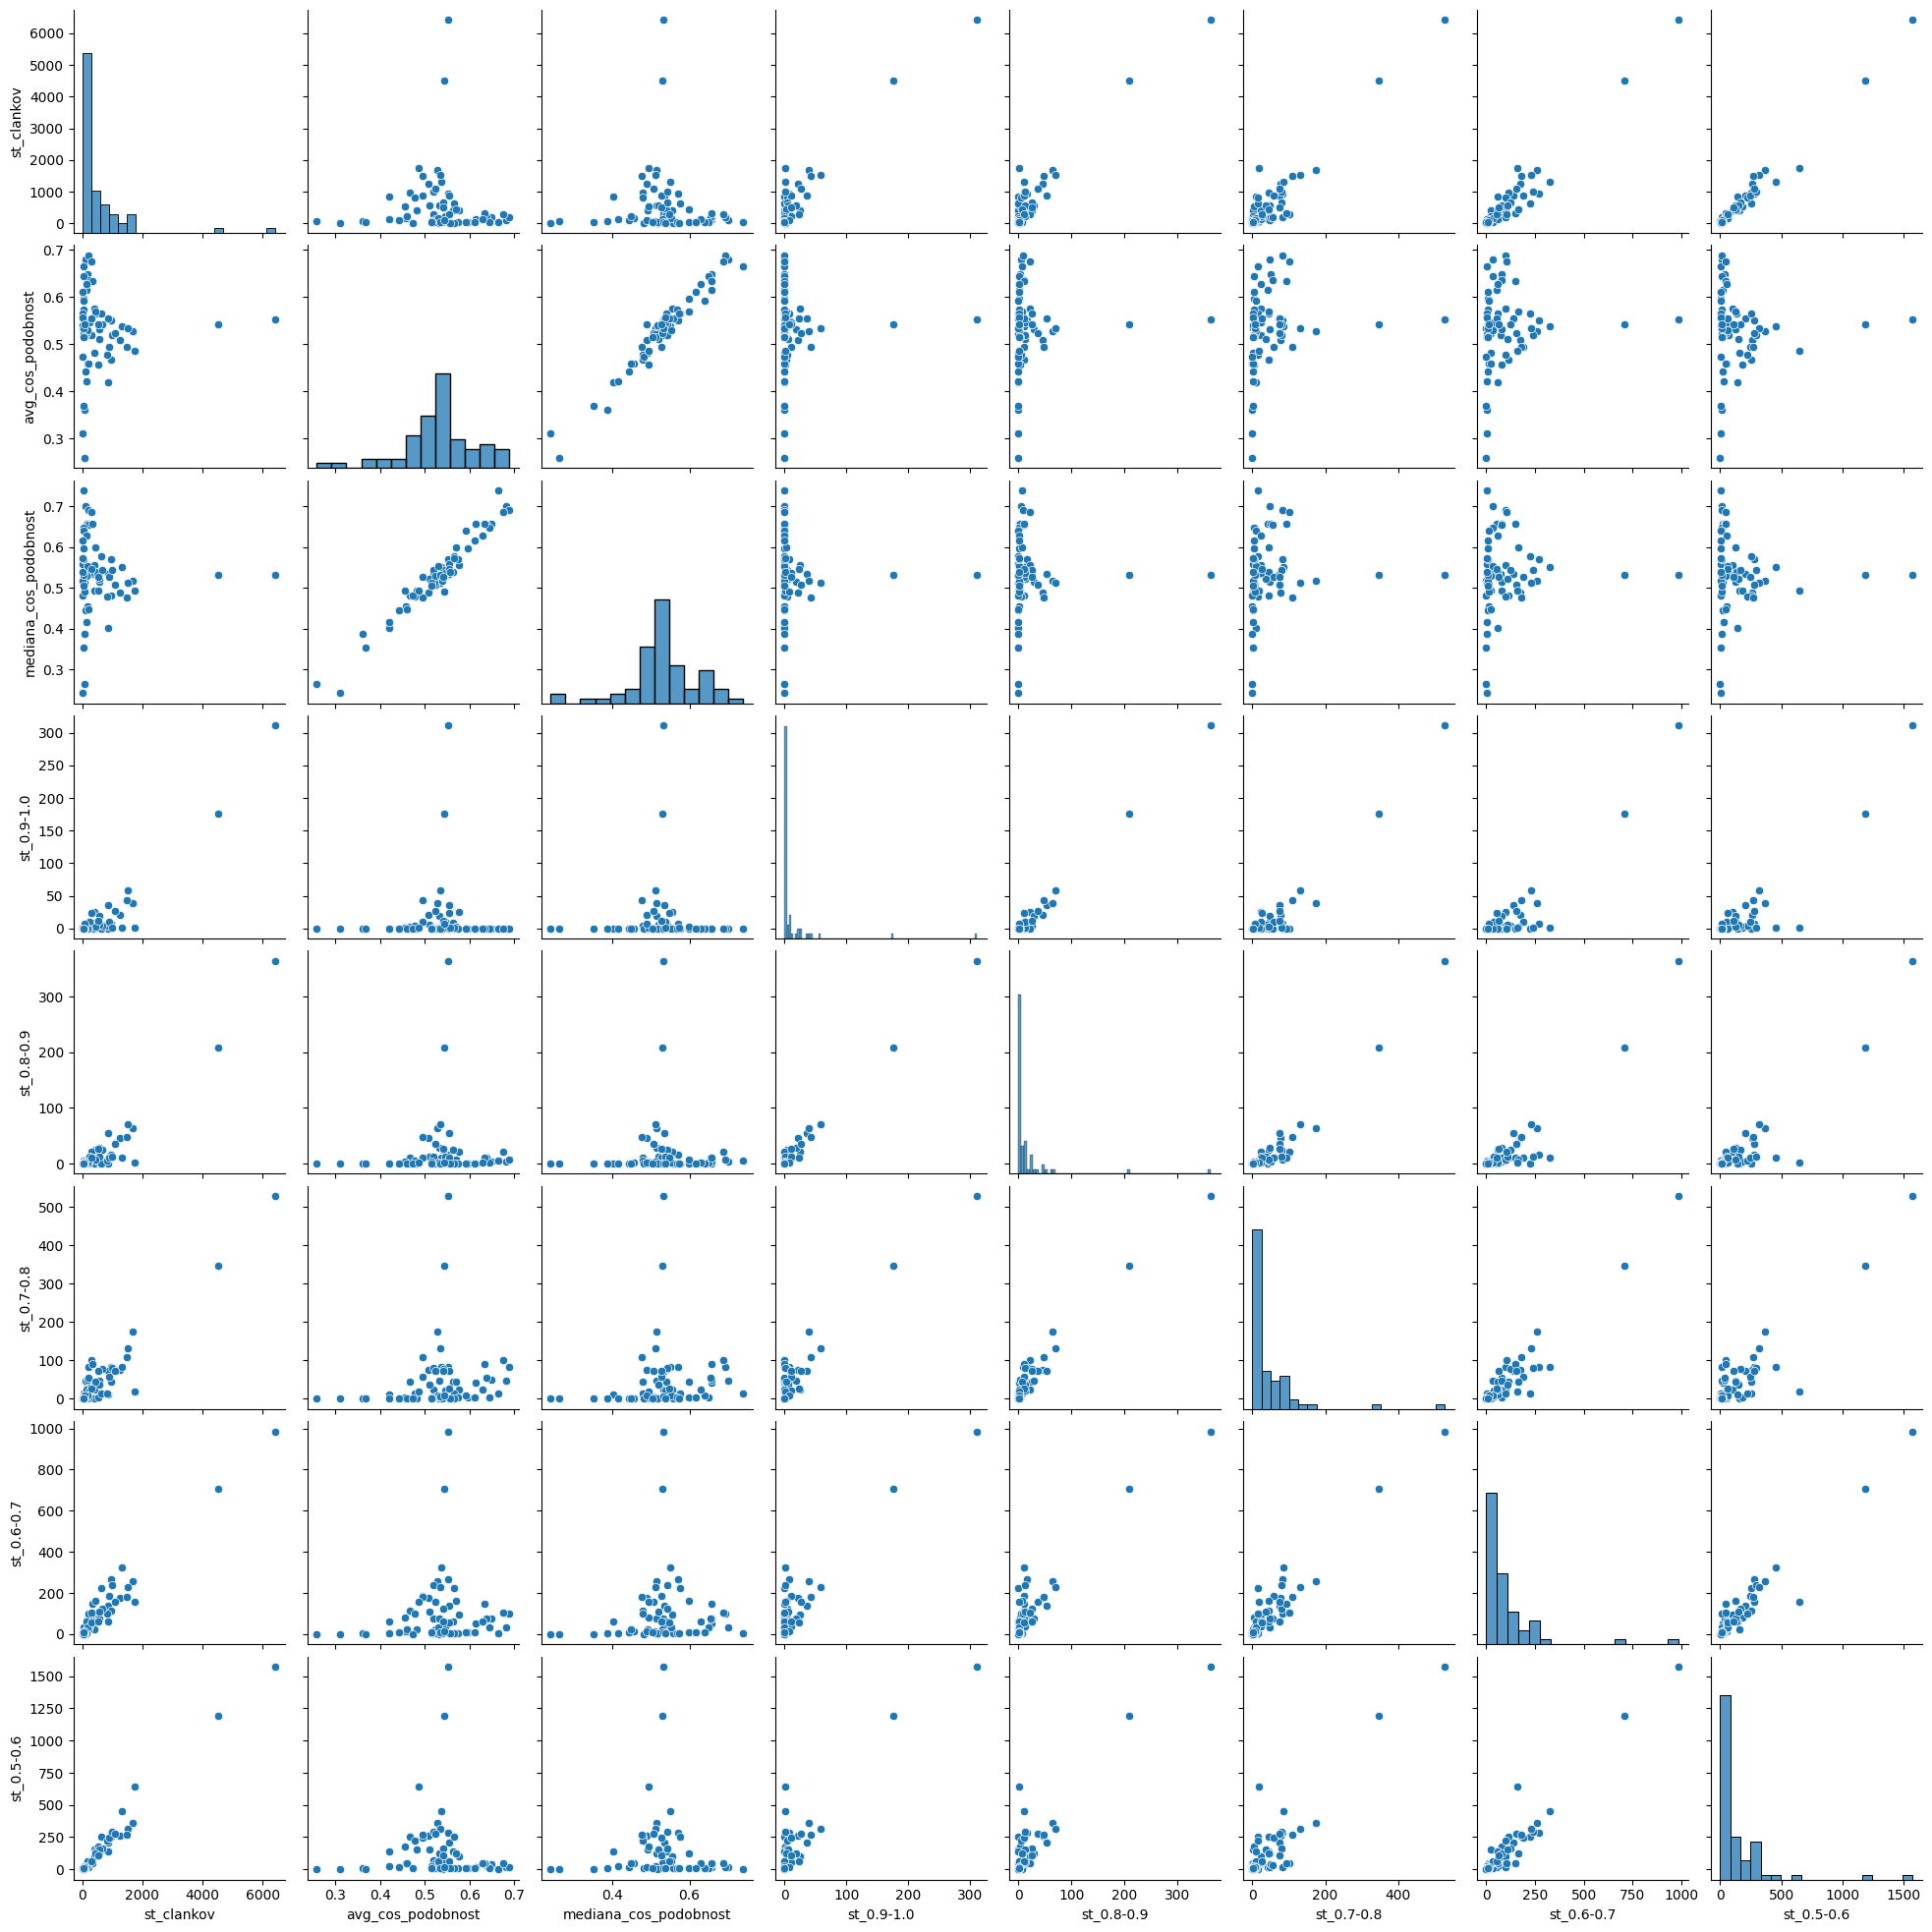

In [41]:
sns.pairplot(avt_siol)


Opazimo cca linerano odvisnost med številom objav ter 
kosniusnih podobnostih v vsakem od intervalov.